# Workshop 1
## Jose Pablo Cobos Austria
## A01274631

## 2.3 Challenge: Data management and descriptive statistics.

In [7]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr

In [8]:
BTC = pdr.get_data_yahoo('BTC-USD',
start="01/01/2017", interval="d")

In [9]:
BTC

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-01,1003.080017,958.698975,963.658020,998.325012,147775008,998.325012
2017-01-02,1031.390015,996.702026,998.617004,1021.750000,222184992,1021.750000
2017-01-03,1044.079956,1021.599976,1021.599976,1043.839966,185168000,1043.839966
2017-01-04,1159.420044,1044.400024,1044.400024,1154.729980,344945984,1154.729980
2017-01-05,1191.099976,910.416992,1156.729980,1013.380005,510199008,1013.380005
...,...,...,...,...,...,...
2022-09-11,21770.552734,21406.945312,21678.542969,21769.255859,34493951963,21769.255859
2022-09-12,22439.181641,21603.896484,21770.148438,22370.449219,50212088965,22370.449219
2022-09-13,22673.820312,20062.669922,22371.480469,20296.707031,51091116622,20296.707031


In [10]:
BTC.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-09-11,21770.552734,21406.945312,21678.542969,21769.255859,34493951963,21769.255859
2022-09-12,22439.181641,21603.896484,21770.148438,22370.449219,50212088965,22370.449219
2022-09-13,22673.820312,20062.669922,22371.480469,20296.707031,51091116622,20296.707031
2022-09-14,20467.201172,19793.396484,20184.554688,20241.089844,37872380889,20241.089844
2022-09-15,20303.312500,20000.691406,20252.300781,20076.671875,40337354752,20076.671875


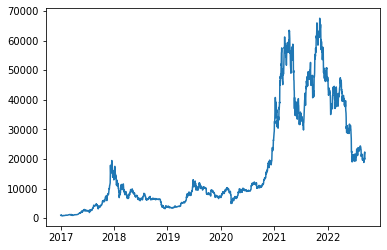

In [11]:
import matplotlib
from matplotlib.pyplot import*
from matplotlib import pyplot
# Pandas data reader puede hacer plots directamente
# de matplotlib.pyplot
plot(BTC["Close"]) # Se selecciona la columna close
show() # Se muestra el grafico

In [12]:
BTC.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2084 entries, 2017-01-01 to 2022-09-15
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       2084 non-null   float64
 1   Low        2084 non-null   float64
 2   Open       2084 non-null   float64
 3   Close      2084 non-null   float64
 4   Volume     2084 non-null   int64  
 5   Adj Close  2084 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 114.0 KB


## 2.3.2.3 Continuously compounded returns

In [13]:
BTC["R"] = (BTC["Close"] / BTC["Close"].shift(1)) - 1
print(BTC["R"])

Date
2017-01-01         NaN
2017-01-02    0.023464
2017-01-03    0.021620
2017-01-04    0.106233
2017-01-05   -0.122410
                ...   
2022-09-11    0.004092
2022-09-12    0.027617
2022-09-13   -0.092700
2022-09-14   -0.002740
2022-09-15   -0.008123
Name: R, Length: 2084, dtype: float64


In [14]:
BTC["r"] = np.log(BTC['Adj Close']) - np.log(BTC['Adj Close'].shift(1))
BTCR = BTC[['R','r']].copy()

In [15]:
BTC= BTC.dropna()

## 2.3.2.4 Descriptive statistics of returns

In [16]:
sumret = BTC["R"].describe()
sumret

count    2083.000000
mean        0.002300
std         0.041273
min        -0.371695
25%        -0.015852
50%         0.002082
75%         0.020649
max         0.252472
Name: R, dtype: float64

In [17]:

BTC[BTC["R"]<-0.15]


,High,Low,Open,Close,Volume,Adj Close,R,r
Date,,,,,,,,
2017-09-14,3920.600098,3153.860107,3875.370117,3154.949951,2716310016,3154.949951,-0.187411,-0.207530
2018-01-16,13843.099609,10194.900391,13836.099609,11490.500000,18853799936,11490.500000,-0.168548,-0.184582
2018-02-05,8364.839844,6756.680176,8270.540039,6955.270020,9285289984,6955.270020,-0.159688,-0.173982
2020-03-12,7929.116211,4860.354004,7913.616211,4970.788086,53980357243,4970.788086,-0.371695,-0.464730
2022-06-13,26795.589844,22141.257812,26737.578125,22487.388672,68204556440,22487.388672,-0.159747,-0.174053


In [18]:

BTC[BTC["R"]>0.15].sort_values(by=['R'], ascending=False)

,High,Low,Open,Close,Volume,Adj Close,R,r
Date,,,,,,,,
2017-12-07,17899.699219,14057.299805,14266.099609,17899.699219,17950699520,17899.699219,0.252472,0.225119
2017-07-20,2900.699951,2269.889893,2269.889893,2817.600098,2249260032,2817.600098,0.239361,0.214596
2017-12-06,14369.099609,11923.400391,11923.400391,14291.500000,12656300032,14291.500000,0.199283,0.181724
2021-02-08,46203.929688,38076.324219,38886.828125,46196.464844,101467222687,46196.464844,0.187465,0.171821
2020-03-19,6329.735840,5236.968750,5245.416504,6191.192871,51000731797,6191.192871,0.181878,0.167104
2019-04-02,4905.954590,4155.316895,4156.919434,4879.877930,21315047816,4879.877930,0.173560,0.160042
2019-10-25,8691.540039,7479.984375,7490.703125,8660.700195,28705065488,8660.700195,0.155763,0.144761
2017-07-17,2230.489990,1932.619995,1932.619995,2228.409912,1201760000,2228.409912,0.154724,0.143862
2017-09-15,3733.449951,2946.620117,3166.300049,3637.520020,4148069888,3637.520020,0.152956,0.142330


In [19]:
print("The daily average return of Bitcoin is ", BTC["r"].mean())
print("The daily variance of Bitcoin is ", BTC["r"].var())
print("The daily standard deviation (volatility) of Bitcoin return is ", BTC["r"].std())
print("The daily median return of Bitcoin is ",BTC["r"].median())

The daily average return of Bitcoin is  0.0014408232981100017
The daily variance of Bitcoin is  0.0017293249091781258
The daily standard deviation (volatility) of Bitcoin return is  0.041585152508775605
The daily median return of Bitcoin is  0.002080242524957754


## 3.2 CHALLENGES: Histogram

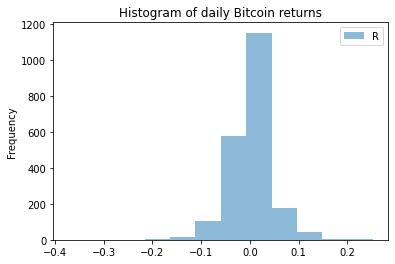

In [20]:
r_bitcoin = BTC[["R"]]
hist = r_bitcoin.plot.hist( bins=12, alpha=0.5, title="Histogram of daily Bitcoin returns" )

## 5.2 CHALLENGE: Simulating the normal distribution

0.0023004433679514615
0.041272865895286566
2083


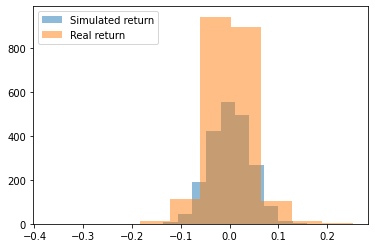

In [21]:

print(BTC["R"].mean())
print(BTC["R"].std())
print(len(BTC["R"].axes[0]))



Simulated_return = np.random.normal(loc = BTC["R"].mean(), scale = BTC["R"].std(), size = len(BTC["R"].axes[0]))

pyplot.hist(Simulated_return, bins = 10, alpha = 0.5, label = "Simulated return")
pyplot.hist(r_bitcoin, bins = 10, alpha = 0.5, label = "Real return")
pyplot.legend(loc="upper left")
pyplot.show()